## Import the required packages

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import asksaveasfilename

## II. Data Exploration

#### Load the cleaned CSV file

In [2]:
# Verify your working directory
print("Current working directory:", os.getcwd())

# Select your raw CSV for taxi trip records
Tk().withdraw()  # Hide the root window
file_path = askopenfilename(title="Select your local taxi data CSV (ensure it's the cleaned data)")


# Check and load
if not file_path or not os.path.exists(file_path):
    raise FileNotFoundError("File not found or not selected.")
else:
    df = pd.read_csv(file_path)
    print("Loaded file:", file_path)
    print("Initial shape:", df.shape)

Current working directory: /Users/elliekavanagh/Downloads/Data for Taxi Project/Notebooks
Loaded file: /Users/elliekavanagh/Downloads/Data for Taxi Project/Clean_Jan_Feb_2023_Yellow_Taxi_Trip_Data.csv
Initial shape: (5681049, 21)


#### 1. Simple Visualizations

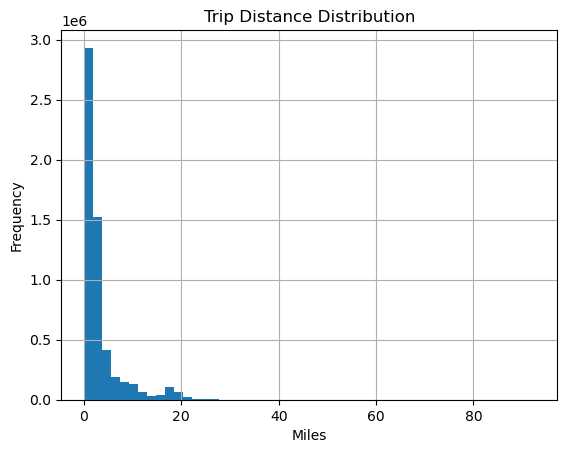

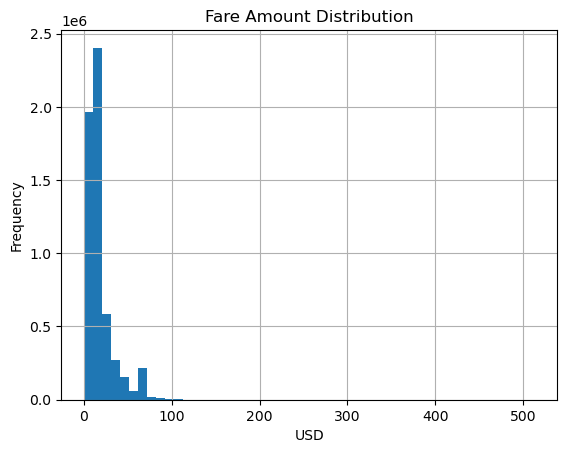

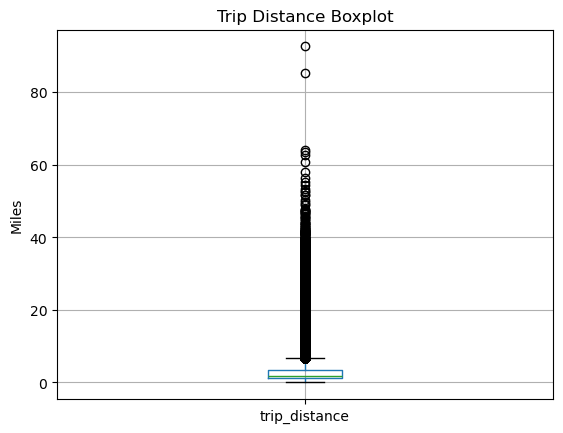

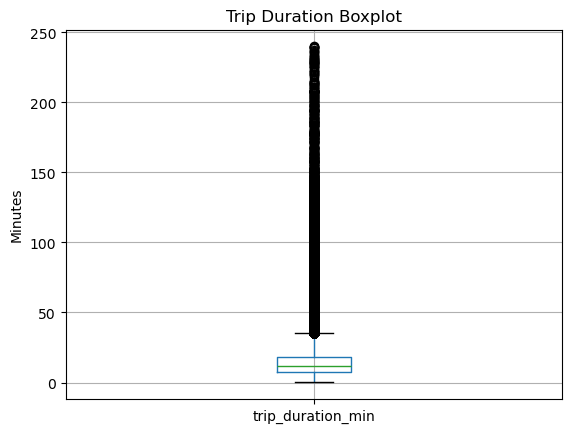

In [3]:
# Histogram: Trip Distance
plt.figure()
df['trip_distance'].hist(bins=50)
plt.title("Trip Distance Distribution")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Histogram: Fare Amount
plt.figure()
df['fare_amount'].hist(bins=50)
plt.title("Fare Amount Distribution")
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.show()

# Boxplot: Trip Distance (to visualize outliers)
plt.figure()
df.boxplot(column='trip_distance')
plt.title("Trip Distance Boxplot")
plt.ylabel("Miles")
plt.show()

# Boxplot: Trip Duration
plt.figure()
df.boxplot(column='trip_duration_min')
plt.title("Trip Duration Boxplot")
plt.ylabel("Minutes")
plt.show()

#### 2. trip_duration vs. pickup_hour

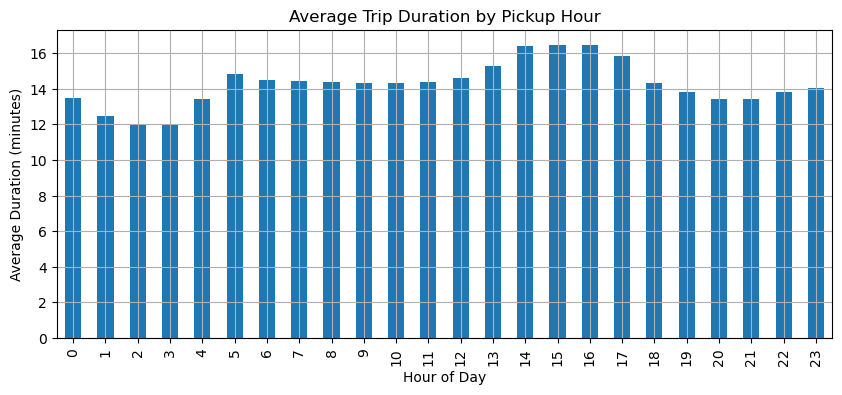

In [4]:
# Average trip duration by pickup hour
avg_duration_by_hour = df.groupby('pickup_hour')['trip_duration_min'].mean()

avg_duration_by_hour.plot(kind='bar', figsize=(10, 4), title='Average Trip Duration by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

#### 3. Trip volume by hour

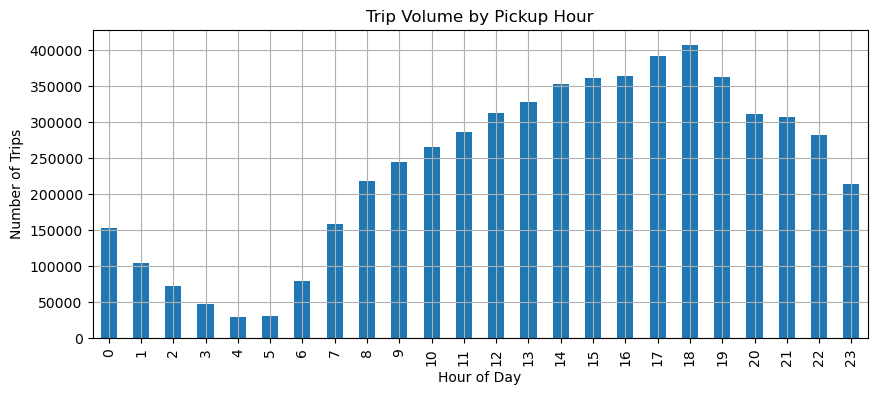

In [5]:
# Count trips per pickup hour
trip_volume_by_hour = df['pickup_hour'].value_counts().sort_index()

# Plot
trip_volume_by_hour.plot(kind='bar', figsize=(10, 4), title='Trip Volume by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

#### 4. Average trip duration by hour and weekday

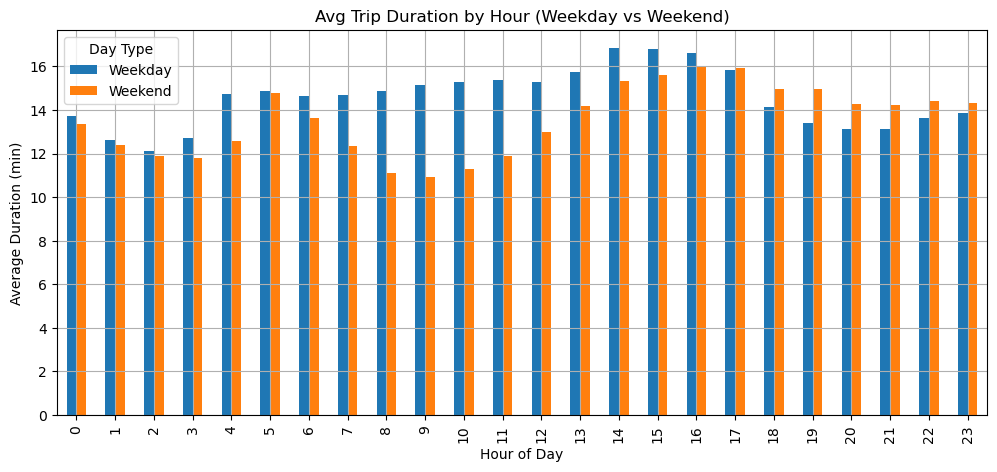

In [6]:
# Group by pickup hour and day_type
avg_duration_daytype = df.groupby(['pickup_hour', 'day_type'])['trip_duration_min'].mean().unstack()

# Plot
avg_duration_daytype.plot(kind='bar', figsize=(12, 5), title='Avg Trip Duration by Hour (Weekday vs Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (min)')
plt.grid(True)
plt.legend(title='Day Type')
plt.show()

#### 5. Trip volume by pickup borough

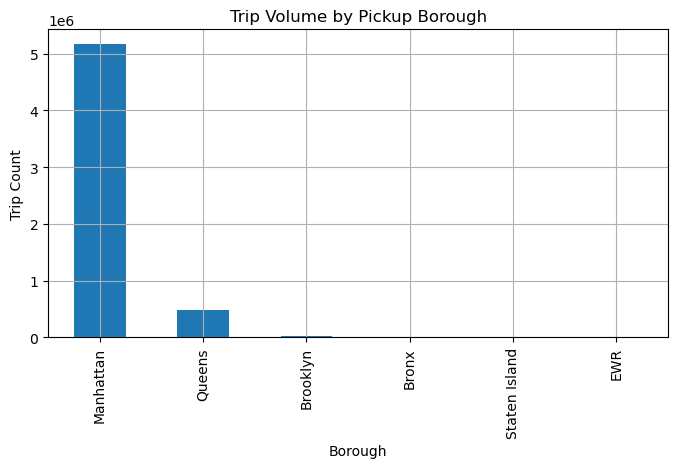

In [7]:
# Requires 'pickup_borough' from the zone lookup merge
pickup_borough_counts = df['pickup_borough'].value_counts()

# Plot
pickup_borough_counts.plot(kind='bar', figsize=(8, 4), title='Trip Volume by Pickup Borough')
plt.xlabel('Borough')
plt.ylabel('Trip Count')
plt.grid(True)
plt.show()

#### 6. Top ten pickup zones

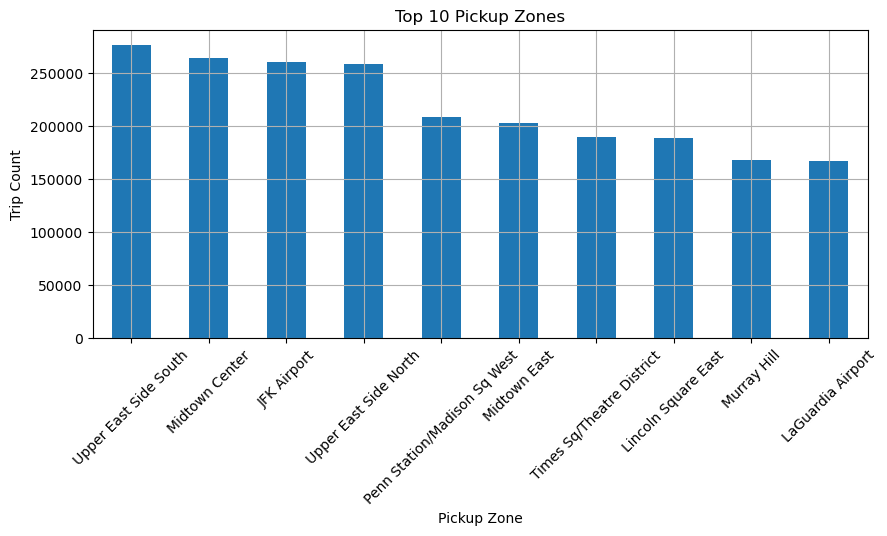

In [8]:
# Requires zone names to be merged already which have been done above
top_pickups = df['pickup_zone'].value_counts().head(10)

top_pickups.plot(kind='bar', figsize=(10, 4), title='Top 10 Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 7. Top Pickup Dropoff Route Pairs (Most Common Trip Routes)

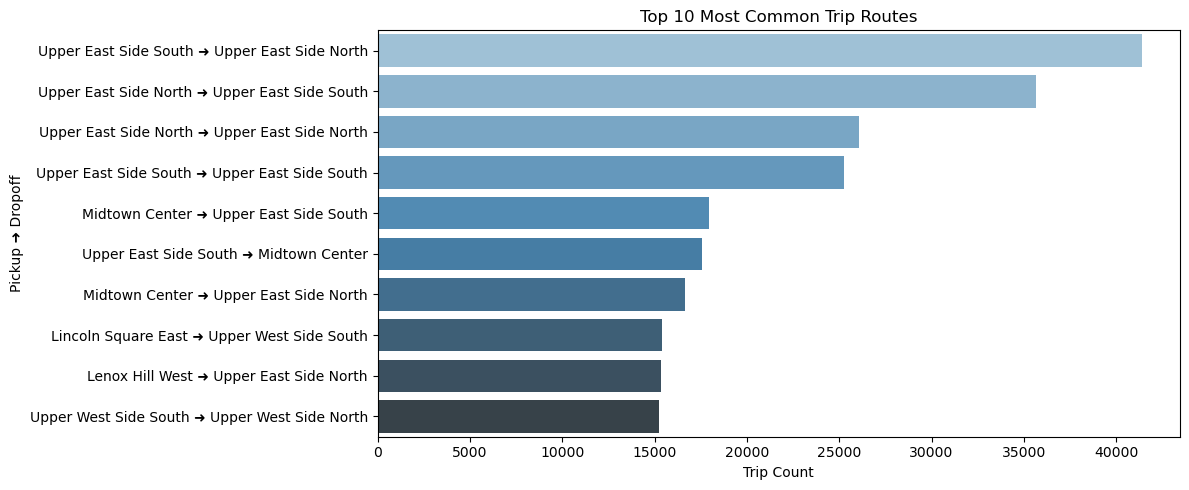

In [9]:
# Count the top 10 most common pickup-dropoff zone pairs
top_routes = (
    df.groupby(['pickup_zone', 'dropoff_zone'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)

# Bar chart of top routes
top_routes['route'] = top_routes['pickup_zone'] + " ➜ " + top_routes['dropoff_zone']

plt.figure(figsize=(12, 5))
sns.barplot(data=top_routes, y='route', x='trip_count', hue='route', palette='Blues_d', legend=False)
plt.title('Top 10 Most Common Trip Routes')
plt.xlabel('Trip Count')
plt.ylabel('Pickup ➜ Dropoff')
plt.tight_layout()
plt.show()

In [10]:
top_routes

,pickup_zone,dropoff_zone,trip_count,route
22810,Upper East Side South,Upper East Side North,41379,Upper East Side South ➜ Upper East Side North
22591,Upper East Side North,Upper East Side South,35628,Upper East Side North ➜ Upper East Side South
22590,Upper East Side North,Upper East Side North,26091,Upper East Side North ➜ Upper East Side North
22811,Upper East Side South,Upper East Side South,25280,Upper East Side South ➜ Upper East Side South
15242,Midtown Center,Upper East Side South,17927,Midtown Center ➜ Upper East Side South
22747,Upper East Side South,Midtown Center,17574,Upper East Side South ➜ Midtown Center
15241,Midtown Center,Upper East Side North,16629,Midtown Center ➜ Upper East Side North
13182,Lincoln Square East,Upper West Side South,15394,Lincoln Square East ➜ Upper West Side South
12954,Lenox Hill West,Upper East Side North,15374,Lenox Hill West ➜ Upper East Side North
23217,Upper West Side South,Upper West Side North,15259,Upper West Side South ➜ Upper West Side North


#### 8. Average fare by pickup zone

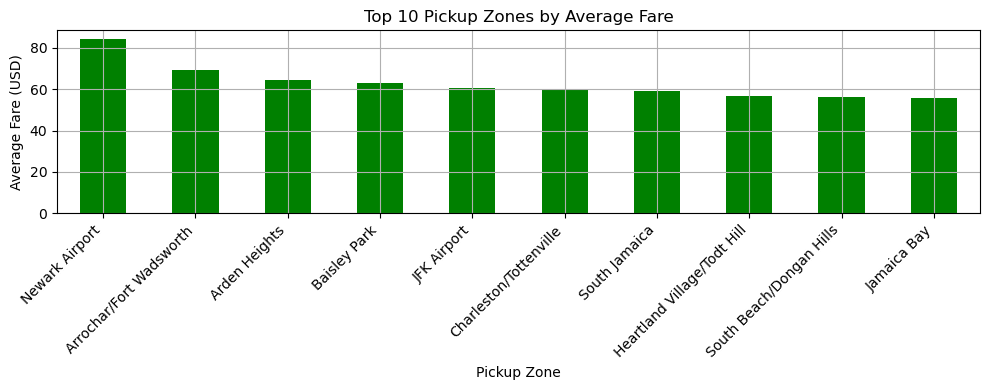

In [11]:
# Group by pickup zone and calculate average fare
avg_fare_by_zone = (
    df.groupby('pickup_zone')['fare_amount']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

avg_fare_by_zone.plot(kind='bar', figsize=(10, 4), title='Top 10 Pickup Zones by Average Fare', color='green')
plt.ylabel('Average Fare (USD)')
plt.xlabel('Pickup Zone')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 9. Number of trips per day

pickup_date
2023-01-01    70860
2023-01-02    60856
2023-01-03    80981
2023-01-04    90232
2023-01-05    96076
2023-01-06    97723
2023-01-07    99601
2023-01-08    79836
2023-01-09    80888
2023-01-10    95364
Name: count, dtype: int64


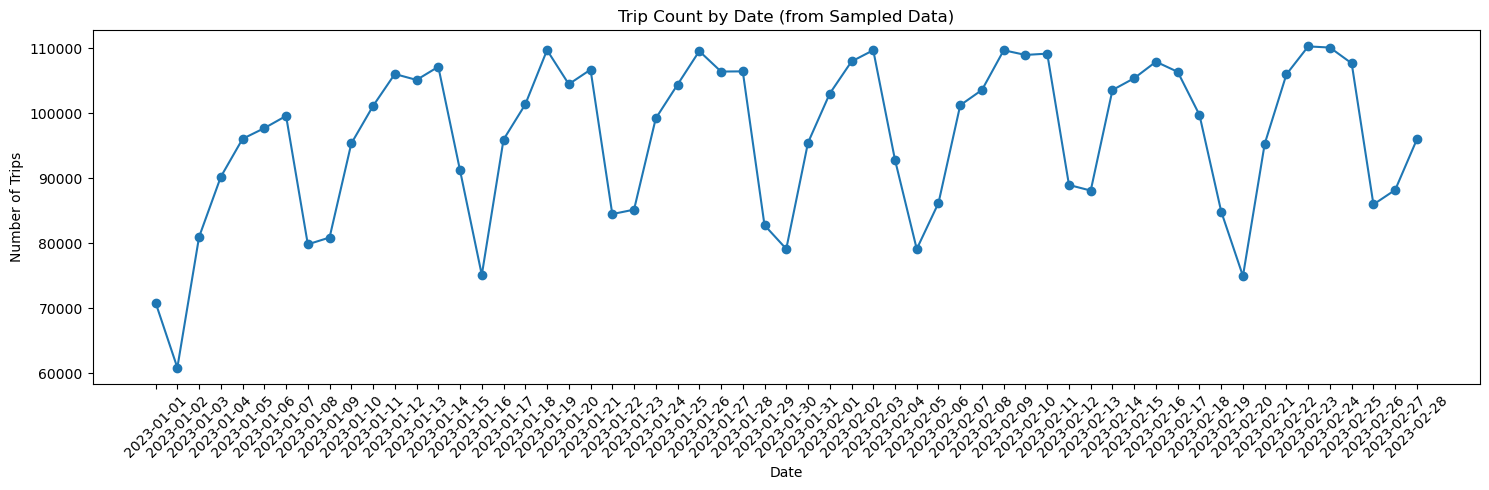

In [12]:
# Count the number of trips per day
date_counts = df['pickup_date'].value_counts().sort_index()

# Inspect a few dates
print(date_counts.head(10))

# Plot the distribution of trip counts for dates
plt.figure(figsize=(15, 5))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title("Trip Count by Date (from Sampled Data)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

#### 10. Trip frequency based on day of week and time of day

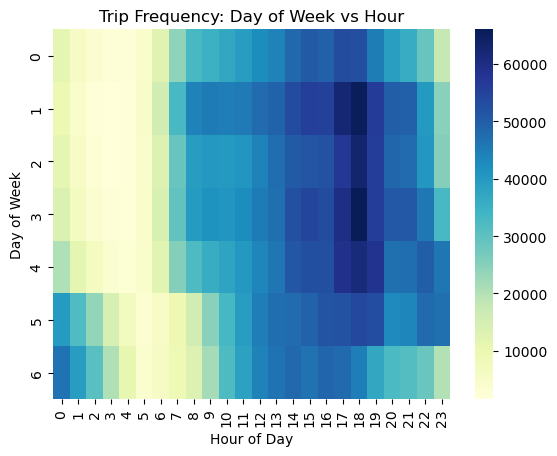

In [13]:
heatmap_data = df.groupby(['pickup_day_of_week', 'pickup_hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Trip Frequency: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

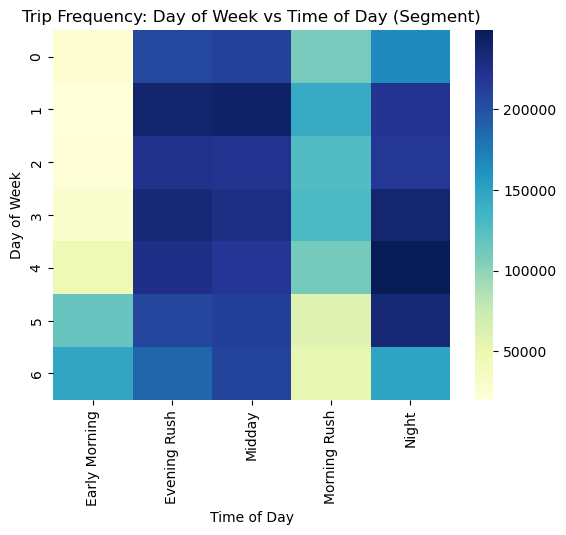

In [14]:
heatmap_data = df.groupby(['pickup_day_of_week', 'time_of_day']).size().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Trip Frequency: Day of Week vs Time of Day (Segment)')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.show()

#### 11. Circuit Flow - Can a taxi driver pickup another trip in the same zone within 15 minutes of dropping off a passenger?

In [15]:
# Create copy of dataframe and sort by dropoff time ascending
circuit_df = df[['pickup_zone', 'dropoff_zone', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'time_of_day', 'day_type', 'fare_amount']].copy()
circuit_df = circuit_df.sort_values(by=['tpep_dropoff_datetime'], ascending=True)
circuit_df

,pickup_zone,dropoff_zone,tpep_pickup_datetime,tpep_dropoff_datetime,time_of_day,day_type,fare_amount
8,East Village,Gramercy,2023-01-01 00:00:47-05:00,2023-01-01 00:04:32-05:00,Early Morning,Weekend,6.5
55,Lincoln Square East,Upper West Side South,2023-01-01 00:03:04-05:00,2023-01-01 00:05:33-05:00,Early Morning,Weekend,5.8
2,Hudson Sq,East Chelsea,2023-01-01 00:00:06-05:00,2023-01-01 00:05:44-05:00,Early Morning,Weekend,9.3
26,Meatpacking/West Village West,West Chelsea/Hudson Yards,2023-01-01 00:02:07-05:00,2023-01-01 00:07:02-05:00,Early Morning,Weekend,7.2
144,Financial District North,Seaport,2023-01-01 00:05:22-05:00,2023-01-01 00:07:23-05:00,Early Morning,Weekend,4.4
...,...,...,...,...,...,...,...
5680977,Upper West Side North,Upper East Side North,2023-02-28 23:43:11-05:00,2023-03-01 00:21:32-05:00,Night,Weekday,36.6
5680921,JFK Airport,Two Bridges/Seward Park,2023-02-28 23:41:49-05:00,2023-03-01 00:21:38-05:00,Night,Weekday,70.0
5680913,JFK Airport,Battery Park City,2023-02-28 23:41:34-05:00,2023-03-01 00:29:44-05:00,Night,Weekday,70.0
5680679,Rockaway Park,Red Hook,2023-02-28 23:36:18-05:00,2023-03-01 00:35:06-05:00,Night,Weekday,57.5


In [16]:
# Create dataframe for 'next pickup'
next_pickup_df = df[['pickup_zone', 'tpep_pickup_datetime', 'dropoff_zone', 'tpep_dropoff_datetime', 'trip_duration_min', 'time_of_day', 'day_type', 'fare_amount']].copy()
next_pickup_df.rename(columns={'tpep_pickup_datetime': 'next_pickup_time', 'pickup_zone': 'next_pickup'}, inplace=True)
next_pickup_df.sort_values(by=['next_pickup_time'], ascending=True)

,next_pickup,next_pickup_time,dropoff_zone,tpep_dropoff_datetime,trip_duration_min,time_of_day,day_type,fare_amount
0,Central Harlem North,2023-01-01 00:00:00-05:00,Central Harlem,2023-01-01 00:08:00-05:00,8.000000,Early Morning,Weekend,12.98
1,West Village,2023-01-01 00:00:05-05:00,Penn Station/Madison Sq West,2023-01-01 00:26:27-05:00,26.366667,Early Morning,Weekend,21.90
2,Hudson Sq,2023-01-01 00:00:06-05:00,East Chelsea,2023-01-01 00:05:44-05:00,5.633333,Early Morning,Weekend,9.30
3,Central Harlem North,2023-01-01 00:00:08-05:00,Washington Heights South,2023-01-01 00:11:24-05:00,11.266667,Early Morning,Weekend,16.30
4,East Village,2023-01-01 00:00:09-05:00,TriBeCa/Civic Center,2023-01-01 00:15:10-05:00,15.016667,Early Morning,Weekend,19.80
...,...,...,...,...,...,...,...,...
5681044,JFK Airport,2023-02-28 23:44:50-05:00,Midwood,2023-03-01 00:10:38-05:00,25.800000,Night,Weekday,58.30
5681045,Penn Station/Madison Sq West,2023-02-28 23:44:53-05:00,TriBeCa/Civic Center,2023-02-28 23:53:32-05:00,8.650000,Night,Weekday,12.10
5681046,Central Park,2023-02-28 23:44:56-05:00,Woodside,2023-02-28 23:48:16-05:00,3.333333,Night,Weekday,5.10
5681047,Lincoln Square East,2023-02-28 23:44:58-05:00,Yorkville West,2023-02-28 23:56:15-05:00,11.283333,Night,Weekday,14.20


In [17]:
# Convert datetime columns
circuit_df['tpep_dropoff_datetime'] = pd.to_datetime(circuit_df['tpep_dropoff_datetime'])
next_pickup_df['next_pickup_time'] = pd.to_datetime(next_pickup_df['next_pickup_time'])

In [18]:
# Merge the tables
flow = pd.merge_asof(
    circuit_df.sort_values('tpep_dropoff_datetime'),  # left DataFrame
    next_pickup_df.sort_values('next_pickup_time'),  # right DataFrame
    left_on='tpep_dropoff_datetime',
    right_on='next_pickup_time',
    left_by='dropoff_zone',
    right_by='next_pickup',
    direction='forward',
    suffixes=('', '_next')
)
flow

,pickup_zone,dropoff_zone,tpep_pickup_datetime,tpep_dropoff_datetime,time_of_day,day_type,fare_amount,next_pickup,next_pickup_time,dropoff_zone_next,tpep_dropoff_datetime_next,trip_duration_min,time_of_day_next,day_type_next,fare_amount_next
0,East Village,Gramercy,2023-01-01 00:00:47-05:00,2023-01-01 00:04:32-05:00,Early Morning,Weekend,6.5,Gramercy,2023-01-01 00:05:37-05:00,East Chelsea,2023-01-01 00:14:56-05:00,9.316667,Early Morning,Weekend,8.60
1,Lincoln Square East,Upper West Side South,2023-01-01 00:03:04-05:00,2023-01-01 00:05:33-05:00,Early Morning,Weekend,5.8,Upper West Side South,2023-01-01 00:05:41-05:00,Clinton West,2023-01-01 00:21:21-05:00,15.666667,Early Morning,Weekend,15.60
2,Hudson Sq,East Chelsea,2023-01-01 00:00:06-05:00,2023-01-01 00:05:44-05:00,Early Morning,Weekend,9.3,East Chelsea,2023-01-01 00:07:57-05:00,Manhattanville,2023-01-01 00:33:52-05:00,25.916667,Early Morning,Weekend,29.60
3,Meatpacking/West Village West,West Chelsea/Hudson Yards,2023-01-01 00:02:07-05:00,2023-01-01 00:07:02-05:00,Early Morning,Weekend,7.2,West Chelsea/Hudson Yards,2023-01-01 00:07:50-05:00,Lincoln Square West,2023-01-01 00:25:42-05:00,17.866667,Early Morning,Weekend,15.60
4,Financial District North,Seaport,2023-01-01 00:05:22-05:00,2023-01-01 00:07:23-05:00,Early Morning,Weekend,4.4,Seaport,2023-01-01 00:17:22-05:00,West Chelsea/Hudson Yards,2023-01-01 00:36:28-05:00,19.100000,Early Morning,Weekend,23.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681044,Upper West Side North,Upper East Side North,2023-02-28 23:43:11-05:00,2023-03-01 00:21:32-05:00,Night,Weekday,36.6,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5681045,JFK Airport,Two Bridges/Seward Park,2023-02-28 23:41:49-05:00,2023-03-01 00:21:38-05:00,Night,Weekday,70.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5681046,JFK Airport,Battery Park City,2023-02-28 23:41:34-05:00,2023-03-01 00:29:44-05:00,Night,Weekday,70.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5681047,Rockaway Park,Red Hook,2023-02-28 23:36:18-05:00,2023-03-01 00:35:06-05:00,Night,Weekday,57.5,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# add column indicating deadhead if wait for next trip > 15 mins
def deadhead(wait_time, threshold=pd.Timedelta('15m')):
    if pd.isnull(wait_time):
        return 'Deadhead'  # No next pickup matched
    return 'Circuit' if wait_time <= threshold else 'Deadhead'

# Calculate wait time between dropoff and next pickup
flow['wait_time'] = flow['next_pickup_time'] - flow['tpep_dropoff_datetime']

# Apply the function row-wise to create the flag
flow['Deadhead/Circuit'] = flow['wait_time'].apply(deadhead)

In [20]:
# Count occurrences of Deadhead and Circuit per pickup_zone
counts = flow.groupby(['pickup_zone', 'Deadhead/Circuit']).size().unstack(fill_value=0)

# Calculate proportions
proportions = counts.div(counts.sum(axis=1), axis=0)

# Add a new column for total count of trips
proportions['total_trips'] = counts.sum(axis=1)

# Sort by proportion of Deadhead (or Circuit) for better visualization
proportions = proportions.sort_values(by='Deadhead', ascending=False)

proportions

Deadhead/Circuit,Circuit,Deadhead,total_trips
pickup_zone,,,
Broad Channel,0.000000,1.000000,3
Stapleton,0.000000,1.000000,1
Westerleigh,0.000000,1.000000,2
Rikers Island,0.000000,1.000000,2
Country Club,0.000000,1.000000,3
...,...,...,...
Central Park,0.976023,0.023977,93172
Upper East Side North,0.977652,0.022348,258594
Crotona Park,1.000000,0.000000,2


<Figure size 1000x800 with 0 Axes>

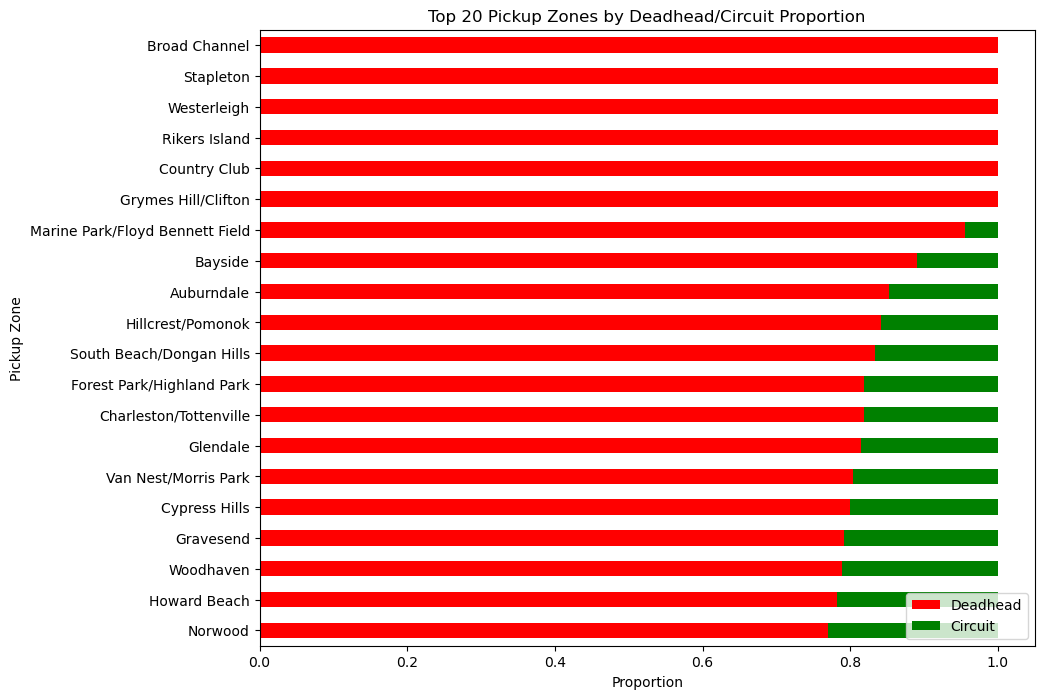

Trip counts for top 20 zones:
pickup_zone
Broad Channel                        3
Stapleton                            1
Westerleigh                          2
Rikers Island                        2
Country Club                         3
Grymes Hill/Clifton                  1
Marine Park/Floyd Bennett Field     67
Bayside                             55
Auburndale                          61
Hillcrest/Pomonok                  164
South Beach/Dongan Hills            24
Forest Park/Highland Park           22
Charleston/Tottenville              55
Glendale                            70
Van Nest/Morris Park               240
Cypress Hills                      205
Gravesend                          125
Woodhaven                          114
Howard Beach                       184
Norwood                            165
Name: total_trips, dtype: int64


In [21]:
# Set minimum threshold for total trips to avoid bias from low-sample zones
#min_trips = 1000  # Adjust this number as needed

# Filter zones with total trips above the threshold
# proportions_filtered = proportions[proportions['total_trips'] > min_trips]
proportions_filtered = proportions[proportions['total_trips'] > 0]

# Sort by Deadhead proportion ascending or descending (you had ascending in your snippet)
proportions_sorted = proportions_filtered.sort_values(by='Deadhead', ascending=False)

# Select top 20
top_20 = proportions_sorted.head(20)

# Plot stacked bar chart for proportions
plt.figure(figsize=(10, 8))
top_20[['Deadhead', 'Circuit']].plot(
    kind='barh',
    stacked=True,
    color=['red', 'green'],
    figsize=(10, 8),
    legend=True
)

plt.xlabel('Proportion')
plt.ylabel('Pickup Zone')
# plt.title('Top 20 Pickup Zones by Deadhead/Circuit Proportion (Trips > {})'.format(min_trips))
plt.title('Top 20 Pickup Zones by Deadhead/Circuit Proportion')
plt.gca().invert_yaxis()  # Highest proportion on top
plt.legend(loc='lower right')

# Show plot
plt.show()

# Also print the number of trips for the top 20 zones
print("Trip counts for top 20 zones:")
print(top_20['total_trips'])

<Figure size 1000x800 with 0 Axes>

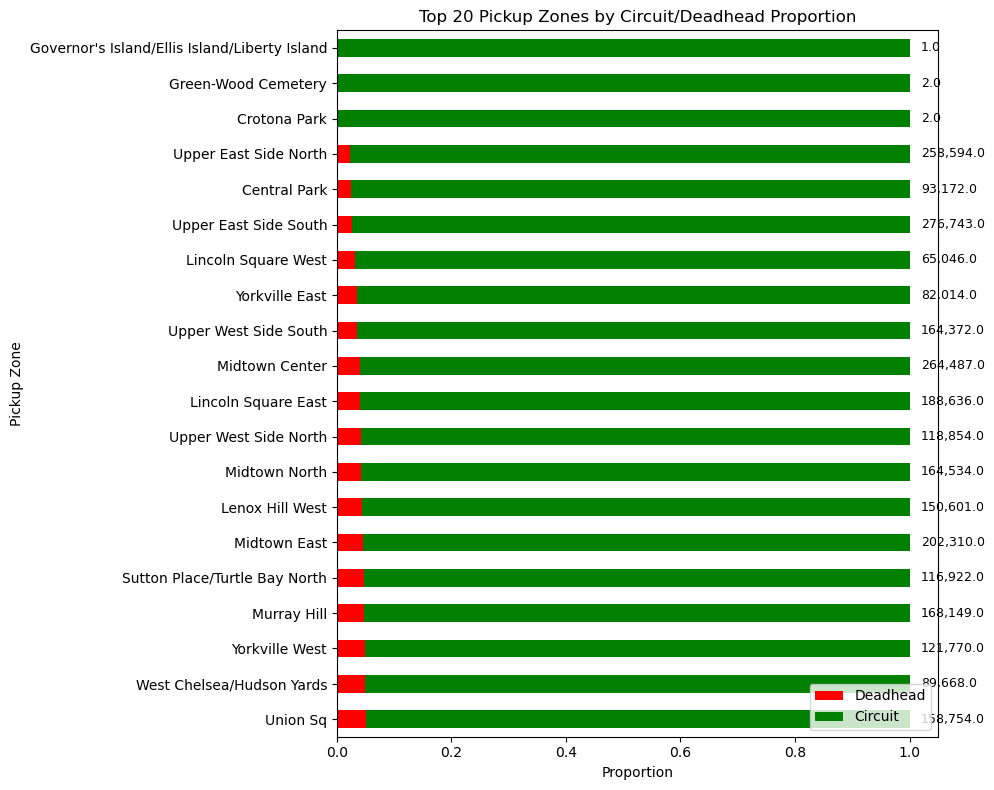

In [22]:
# Assuming 'total_trips' column already exists in proportions (sum of counts per zone)
# If not, add it like this:
# proportions['total_trips'] = counts.sum(axis=1)

# Sort by Deadhead proportion ascending
proportions_sorted = proportions.sort_values(by='Deadhead', ascending=True)

# Select top 20
top_20 = proportions_sorted.head(20)

plt.figure(figsize=(10, 8))

# Plot stacked barh
ax = top_20[['Deadhead', 'Circuit']].plot(
    kind='barh',
    stacked=True,
    color=['red', 'green'],
    figsize=(10, 8),
    legend=True
)

plt.xlabel('Proportion')
plt.ylabel('Pickup Zone')
plt.title('Top 20 Pickup Zones by Circuit/Deadhead Proportion')
plt.gca().invert_yaxis()  # Highest on top
plt.legend(loc='lower right')

# Add trip counts as text labels to the right of bars
for i, (idx, row) in enumerate(top_20.iterrows()):
    trip_count = row['total_trips']
    ax.text(
        1.02,  # slightly past the 100% mark on x-axis
        i,     # vertical position aligned with bar index
        f'{trip_count:,}',  # formatted with commas
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

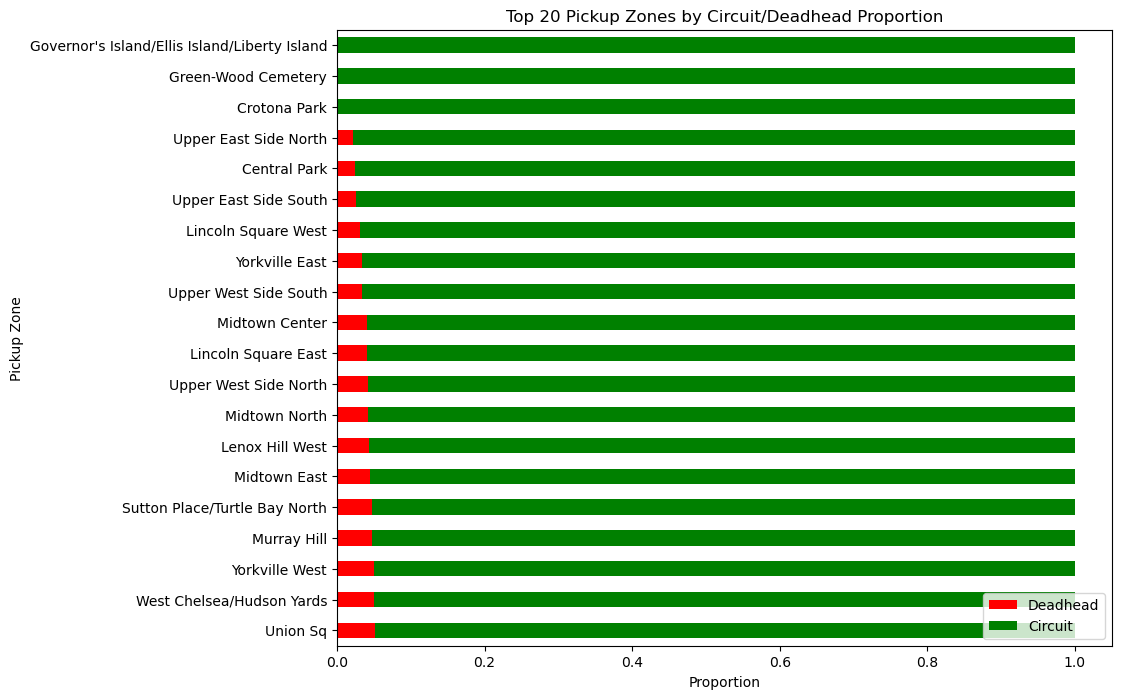

In [23]:
# Sort by Deadhead proportion descending
proportions_sorted = proportions.sort_values(by='Deadhead', ascending=True)

# Select top 20
top_20 = proportions_sorted.head(20)

plt.figure(figsize=(10, 8))
top_20[['Deadhead', 'Circuit']].plot(
    kind='barh',
    stacked=True,
    color=['red', 'green'],
    figsize=(10, 8),
    legend=True
)
plt.xlabel('Proportion')
plt.ylabel('Pickup Zone')
plt.title('Top 20 Pickup Zones by Circuit/Deadhead Proportion')
plt.gca().invert_yaxis()  # So the highest is on top
plt.legend(loc='lower right')
plt.show()

# Need to adjust it to show trip counts > certain threshold (might be biased samples for certain ones)

#### 11a. Circuit Flow - Analysis by Zone

In [24]:
# Verify your working directory
print("Current working directory:", os.getcwd())

# Select your raw CSV for taxi trip records
Tk().withdraw()  # Hide the root window
shapefile_path = askopenfilename(title="Select the taxi zone shapefile")

# Check and load
if not shapefile_path or not os.path.exists(shapefile_path):
    raise FileNotFoundError("File not found or not selected.")
else:
    zones_gdf = gpd.read_file(shapefile_path)
    print("Loaded file:", shapefile_path)
    print("Initial shape:", df.shape)

Current working directory: /Users/elliekavanagh/Downloads/Data for Taxi Project/Notebooks
Loaded file: /Users/elliekavanagh/Downloads/taxi_zones (1)/taxi_zones.shp
Initial shape: (5681049, 21)


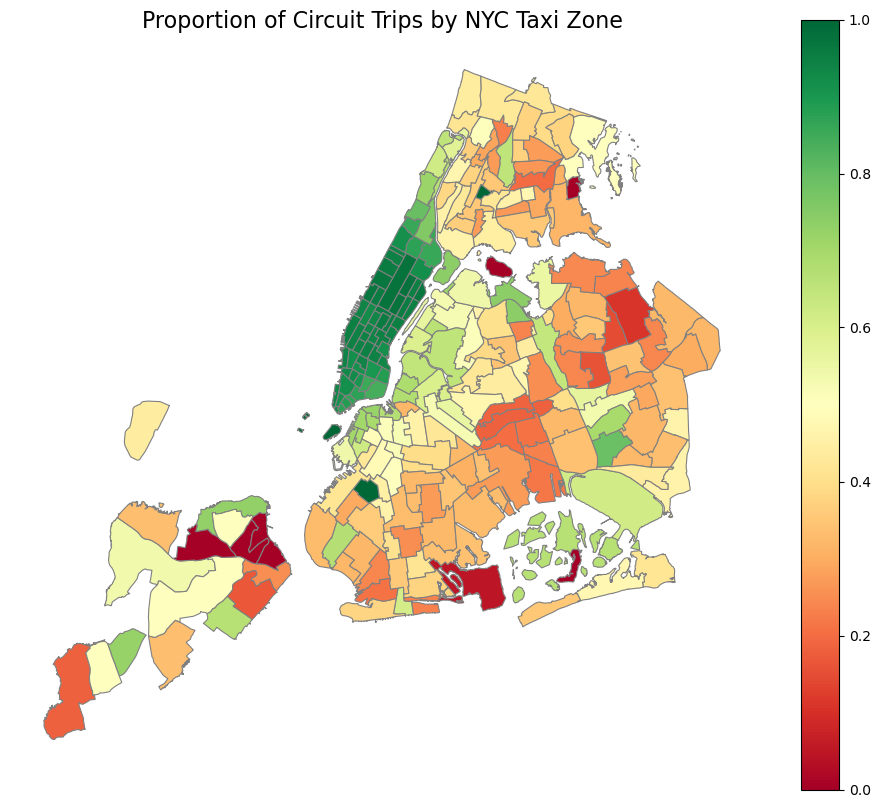

In [25]:
map = zones_gdf.merge(proportions_sorted, how='left', left_on='zone', right_on='pickup_zone')

# Plot CIRCUIT rate map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
map.plot(column='Circuit', cmap='RdYlGn', linewidth=0.8, edgecolor='gray', legend=True, ax=ax)
ax.set_title("Proportion of Circuit Trips by NYC Taxi Zone", fontsize=16)
ax.axis('off')
plt.show()

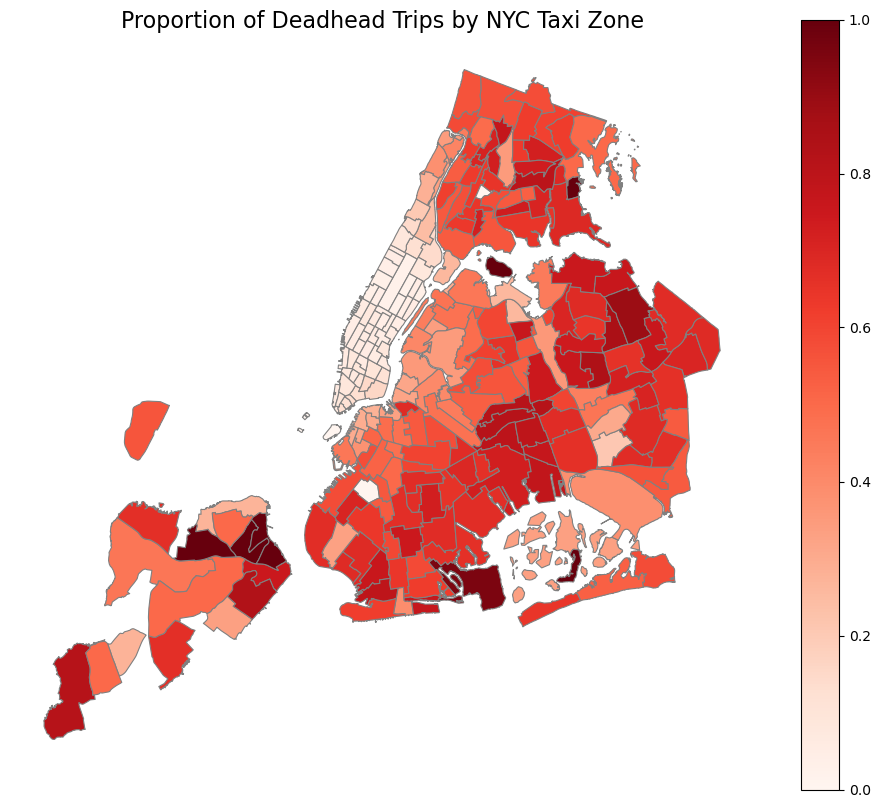

In [26]:
# Plot DEADHEAD rate map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
map.plot(column='Deadhead', cmap='Reds', linewidth=0.8, edgecolor='gray', legend=True, ax=ax)
ax.set_title("Proportion of Deadhead Trips by NYC Taxi Zone", fontsize=16)
ax.axis('off')
plt.show()

In [27]:
flow

,pickup_zone,dropoff_zone,tpep_pickup_datetime,tpep_dropoff_datetime,time_of_day,day_type,fare_amount,next_pickup,next_pickup_time,dropoff_zone_next,tpep_dropoff_datetime_next,trip_duration_min,time_of_day_next,day_type_next,fare_amount_next,wait_time,Deadhead/Circuit
0,East Village,Gramercy,2023-01-01 00:00:47-05:00,2023-01-01 00:04:32-05:00,Early Morning,Weekend,6.5,Gramercy,2023-01-01 00:05:37-05:00,East Chelsea,2023-01-01 00:14:56-05:00,9.316667,Early Morning,Weekend,8.60,0 days 00:01:05,Circuit
1,Lincoln Square East,Upper West Side South,2023-01-01 00:03:04-05:00,2023-01-01 00:05:33-05:00,Early Morning,Weekend,5.8,Upper West Side South,2023-01-01 00:05:41-05:00,Clinton West,2023-01-01 00:21:21-05:00,15.666667,Early Morning,Weekend,15.60,0 days 00:00:08,Circuit
2,Hudson Sq,East Chelsea,2023-01-01 00:00:06-05:00,2023-01-01 00:05:44-05:00,Early Morning,Weekend,9.3,East Chelsea,2023-01-01 00:07:57-05:00,Manhattanville,2023-01-01 00:33:52-05:00,25.916667,Early Morning,Weekend,29.60,0 days 00:02:13,Circuit
3,Meatpacking/West Village West,West Chelsea/Hudson Yards,2023-01-01 00:02:07-05:00,2023-01-01 00:07:02-05:00,Early Morning,Weekend,7.2,West Chelsea/Hudson Yards,2023-01-01 00:07:50-05:00,Lincoln Square West,2023-01-01 00:25:42-05:00,17.866667,Early Morning,Weekend,15.60,0 days 00:00:48,Circuit
4,Financial District North,Seaport,2023-01-01 00:05:22-05:00,2023-01-01 00:07:23-05:00,Early Morning,Weekend,4.4,Seaport,2023-01-01 00:17:22-05:00,West Chelsea/Hudson Yards,2023-01-01 00:36:28-05:00,19.100000,Early Morning,Weekend,23.82,0 days 00:09:59,Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681044,Upper West Side North,Upper East Side North,2023-02-28 23:43:11-05:00,2023-03-01 00:21:32-05:00,Night,Weekday,36.6,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Deadhead
5681045,JFK Airport,Two Bridges/Seward Park,2023-02-28 23:41:49-05:00,2023-03-01 00:21:38-05:00,Night,Weekday,70.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Deadhead
5681046,JFK Airport,Battery Park City,2023-02-28 23:41:34-05:00,2023-03-01 00:29:44-05:00,Night,Weekday,70.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Deadhead
5681047,Rockaway Park,Red Hook,2023-02-28 23:36:18-05:00,2023-03-01 00:35:06-05:00,Night,Weekday,57.5,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Deadhead


In [28]:
# Count occurrences by pickup_zone, time_of_day, and Deadhead/Circuit
counts_segmented = flow.groupby(['pickup_zone', 'time_of_day', 'Deadhead/Circuit']).size().unstack(fill_value=0)

# Calculate proportions **within each (pickup_zone, time_of_day) group**
proportions_segmented = counts_segmented.div(counts_segmented.sum(axis=1), axis=0)

# Add total trips for each group
proportions_segmented['total_trips'] = counts_segmented.sum(axis=1)

# Optional: sort within groups — here sorting by Deadhead proportion descending
proportions_segmented = proportions_segmented.sort_values(by='Deadhead', ascending=False)

proportions_segmented

Deadhead/Circuit                       Circuit  Deadhead  total_trips
pickup_zone             time_of_day                                  
Allerton/Pelham Gardens Early Morning      0.0       1.0            1
Pelham Bay              Evening Rush       0.0       1.0            3
Ocean Parkway South     Night              0.0       1.0            1
                        Early Morning      0.0       1.0            3
Oakland Gardens         Night              0.0       1.0            4
...                                        ...       ...          ...
Astoria Park            Evening Rush       1.0       0.0            2
New Dorp/Midland Beach  Morning Rush       1.0       0.0            1
                        Night              1.0       0.0            1
Mariners Harbor         Evening Rush       1.0       0.0            1
Highbridge Park         Morning Rush       1.0       0.0            2

[1189 rows x 3 columns]

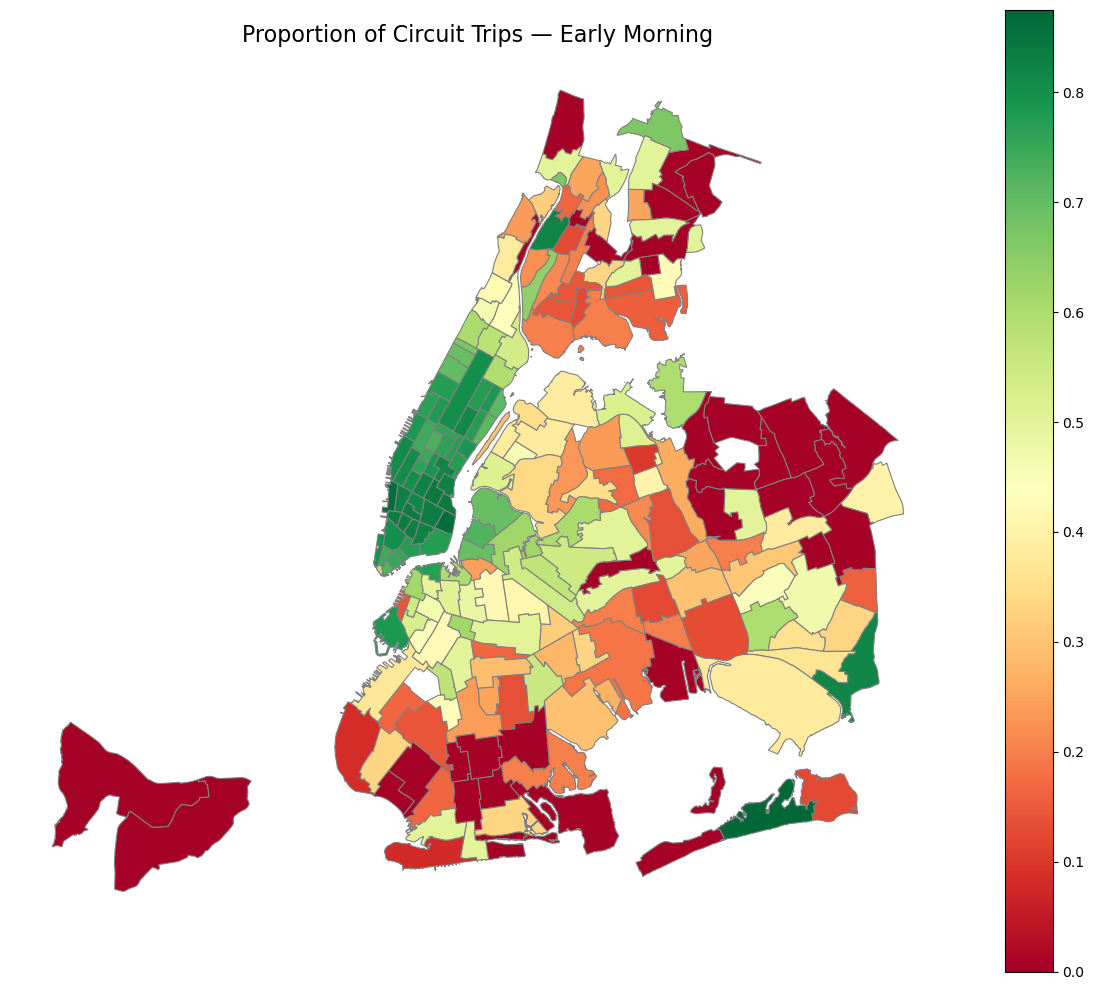

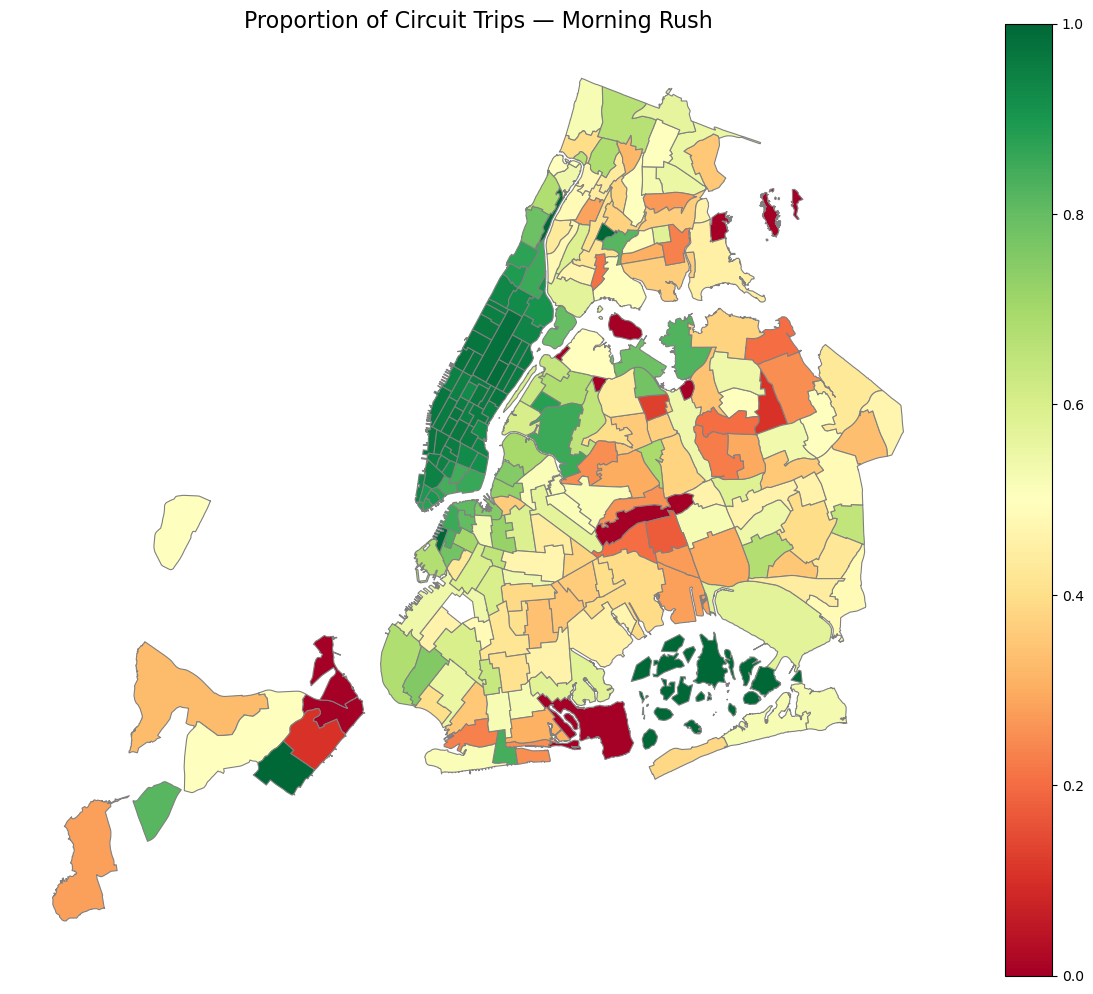

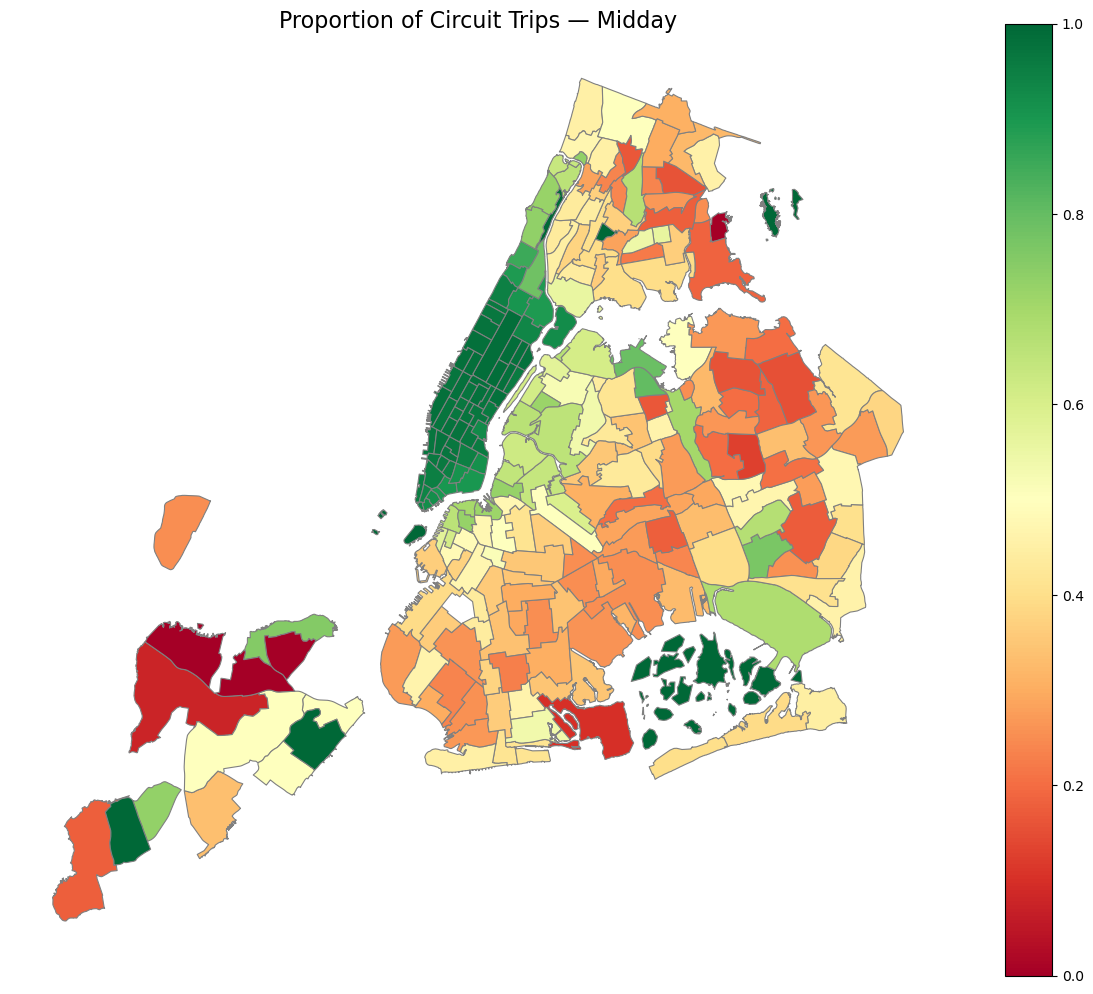

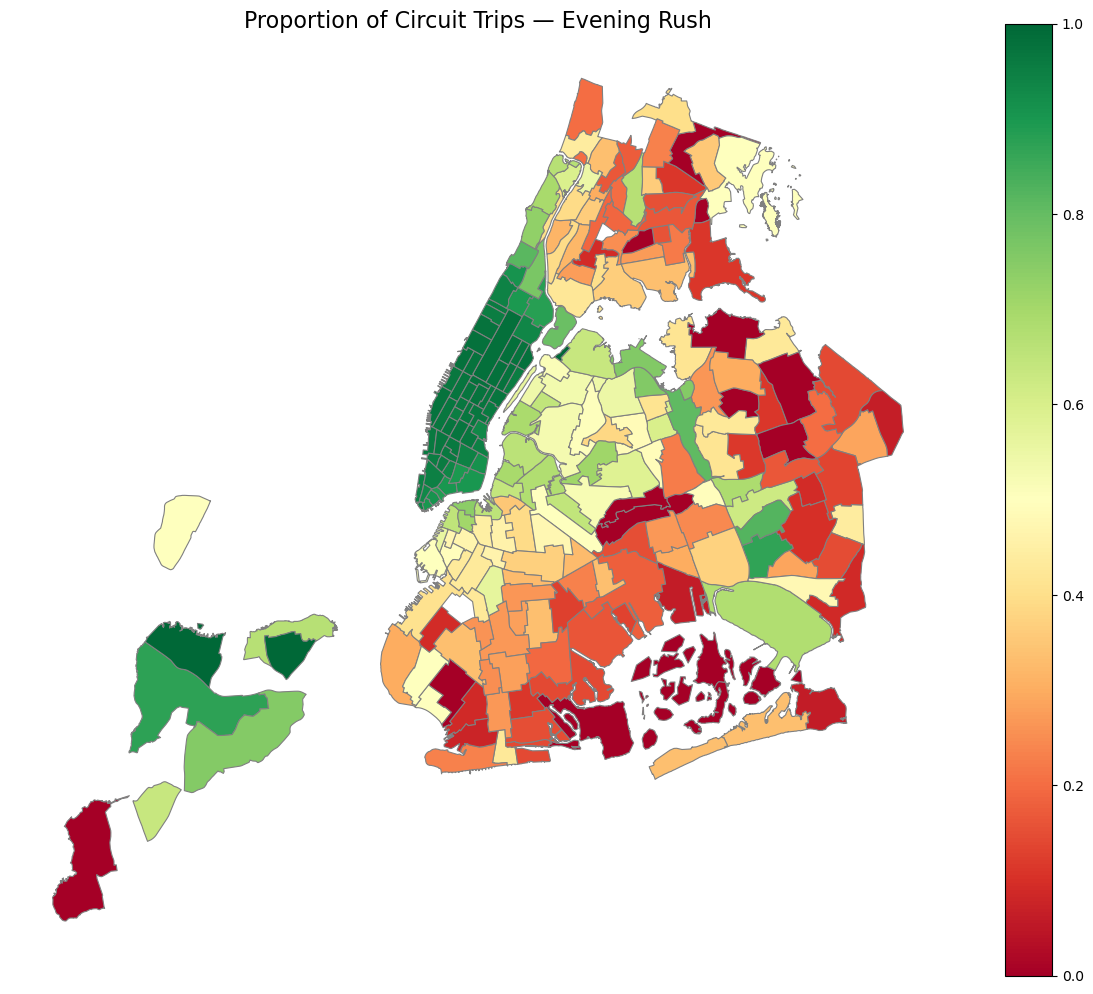

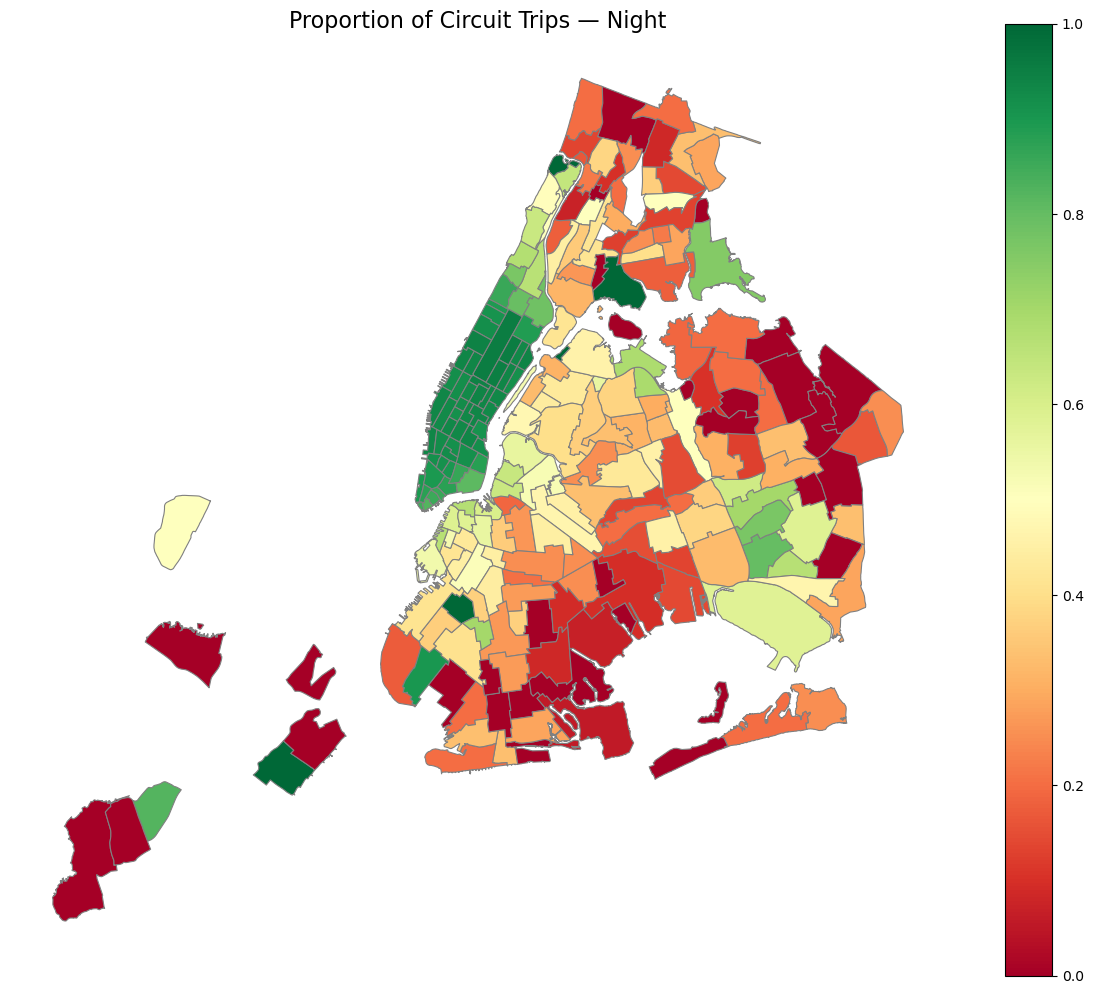

In [29]:
proportions_segmented = proportions_segmented.reset_index() # flatten the columns because it's currently multi-indexed

# Merge proportions with zones_gdf
map_segmented = zones_gdf.merge(
    proportions_segmented,
    how='left',
    left_on='zone',
    right_on='pickup_zone'
)

# Define time buckets
time_order = ['Early Morning', 'Morning Rush', 'Midday', 'Evening Rush', 'Night']

# Plot Circuit proportion for each time segment
for tod in time_order:
    map_slice = map_segmented[map_segmented['time_of_day'] == tod]

    if map_slice.empty:
        print(f"[Warning] No data for: {tod}")
        continue

    fig, ax = plt.subplots(1, 1, figsize=(12, 10))

    map_slice.plot(
        column='Circuit',
        cmap='RdYlGn',
        linewidth=0.8,
        edgecolor='gray',
        legend=True,
        ax=ax
    )

    ax.set_title(f"Proportion of Circuit Trips — {tod}", fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

#### 11b. Circuit vs. Deadhead - Determining the Effective Earnings Per Minute

In [30]:
flow['wait_time_min'] = flow['wait_time'].dt.total_seconds() / 60

**Effective earnings per minute** measures the driver's average revenue earned per minute of active time, where active time includes both the trip duration and any waiting time before the trip. It reflects how efficiently a driver converts their total working time (driving + waiting) into fare income.

This metric provides a more realistic view of a driver's income rate by accounting for waiting periods, not just the time spent driving, helping identify which trips or routes result in better overall earnings efficiency.

In [31]:
flow['effective_earnings_per_min'] = flow['fare_amount'] / (flow['trip_duration_min'] + flow['wait_time_min'])

In [32]:
# Grouping and summarizing some metric, e.g. mean true fare
result = flow.groupby('Deadhead/Circuit', as_index=False)['effective_earnings_per_min'].mean()
result

,Deadhead/Circuit,effective_earnings_per_min
0,Circuit,1.590208
1,Deadhead,0.358983


In [33]:
result = flow.groupby(['Deadhead/Circuit', 'day_type'], as_index=False)['effective_earnings_per_min'].mean()
result

,Deadhead/Circuit,day_type,effective_earnings_per_min
0,Circuit,Weekday,1.579616
1,Circuit,Weekend,1.618060
2,Deadhead,Weekday,0.351307
3,Deadhead,Weekend,0.376582


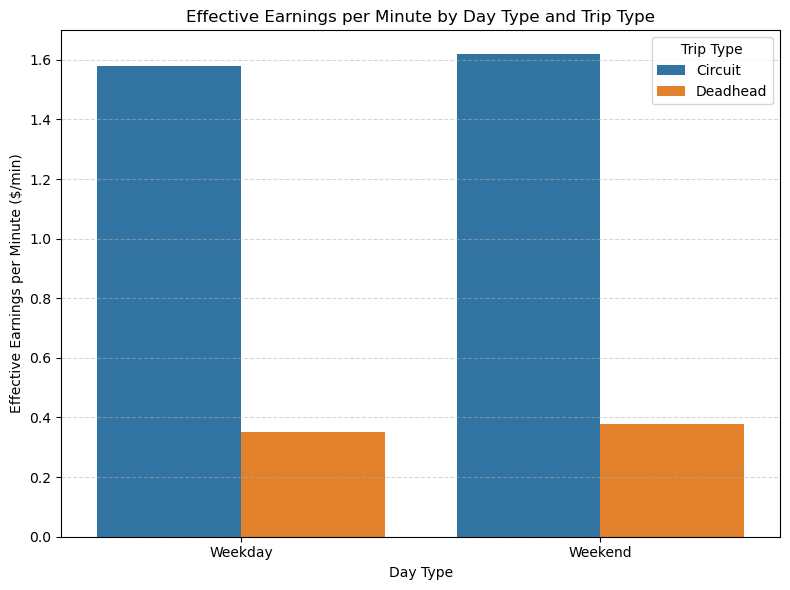

In [34]:
day_order = ['Weekday', 'Weekend']
result['day_type'] = pd.Categorical(result['day_type'], categories=day_order, ordered=True)
result = result.sort_values('day_type')

# Create the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=result,
    x='day_type',
    y='effective_earnings_per_min',
    hue='Deadhead/Circuit'
)

plt.title('Effective Earnings per Minute by Day Type and Trip Type')
plt.ylabel('Effective Earnings per Minute ($/min)')
plt.xlabel('Day Type')
plt.legend(title='Trip Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [35]:
result = flow.groupby(['Deadhead/Circuit', 'time_of_day'], as_index=False)['effective_earnings_per_min'].mean()
result

,Deadhead/Circuit,time_of_day,effective_earnings_per_min
0,Circuit,Early Morning,1.452045
1,Circuit,Evening Rush,1.606253
2,Circuit,Midday,1.549791
3,Circuit,Morning Rush,1.539994
4,Circuit,Night,1.676246
5,Deadhead,Early Morning,0.321827
6,Deadhead,Evening Rush,0.366881
7,Deadhead,Midday,0.356175
8,Deadhead,Morning Rush,0.404564
9,Deadhead,Night,0.362535


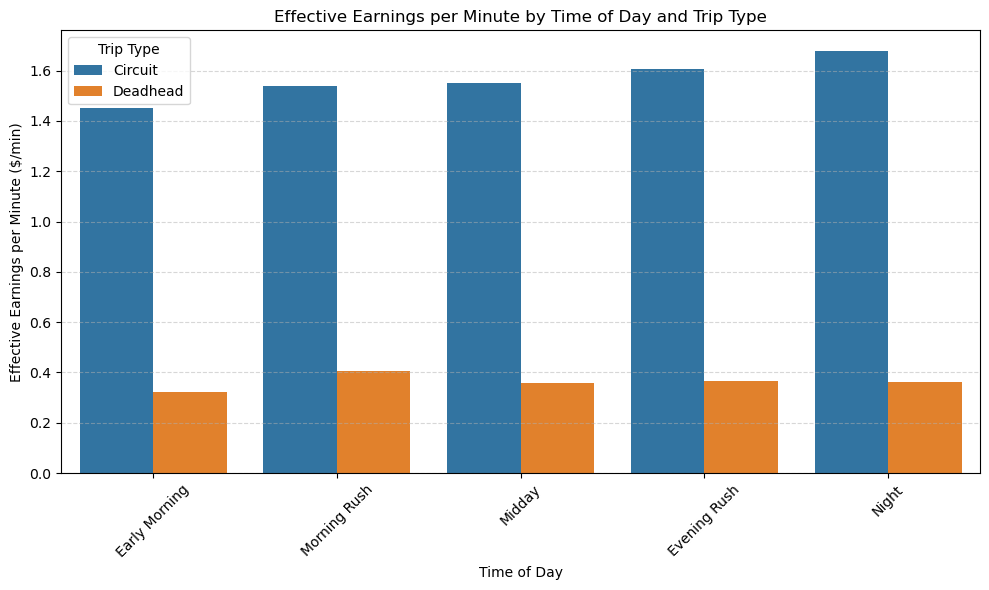

In [36]:
time_order = [
    'Early Morning',
    'Morning Rush',
    'Midday',
    'Evening Rush',
    'Night'
]
result['time_of_day'] = pd.Categorical(result['time_of_day'], categories=time_order, ordered=True)
result = result.sort_values('time_of_day')

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=result,
    x='time_of_day',
    y='effective_earnings_per_min',
    hue='Deadhead/Circuit'
)

# Styling
plt.title('Effective Earnings per Minute by Time of Day and Trip Type')
plt.ylabel('Effective Earnings per Minute ($/min)')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.legend(title='Trip Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Text(0.5, 1.0, 'Driver Earnings: Circuit vs Deadhead Trips')

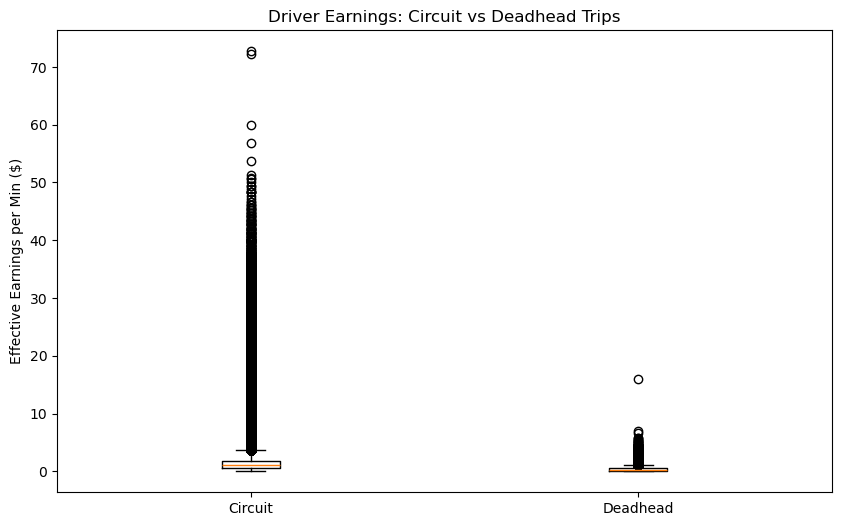

In [37]:
# Create comparison
circuit_earnings = flow[flow['Deadhead/Circuit'] == 'Circuit']['effective_earnings_per_min']
deadhead_earnings = flow[flow['Deadhead/Circuit'] == 'Deadhead']['effective_earnings_per_min']

# Box plot comparison
plt.figure(figsize=(10, 6))
plt.boxplot([circuit_earnings.dropna(), deadhead_earnings.dropna()], 
            labels=['Circuit', 'Deadhead'])
plt.ylabel('Effective Earnings per Min ($)')
plt.title('Driver Earnings: Circuit vs Deadhead Trips')

In [38]:
flow.groupby("Deadhead/Circuit")["effective_earnings_per_min"].describe()

,count,mean,std,min,25%,50%,75%,max
Deadhead/Circuit,,,,,,,,
Circuit,5214138.0,1.590208,1.793526,0.000166,0.647682,1.080569,1.847107,72.720000
Deadhead,463265.0,0.358983,0.397363,0.000006,0.086390,0.233229,0.489692,16.007277


In [39]:
# Calculate circuit proportion for each zone
zone_stats = flow.groupby('pickup_zone').agg({
    'effective_earnings_per_min': ['mean', 'count'],
    'Deadhead/Circuit': lambda x: (x == 'Circuit').mean()
})

# Flatten column names
zone_stats.columns = ['earnings_mean', 'trip_count', 'circuit_proportion']

# Filter for zones with mixed trip types (10-90% circuit rate)
mixed_zones = zone_stats[(zone_stats['circuit_proportion'] > 0.1) & 
                        (zone_stats['circuit_proportion'] < 0.9) &
                        (zone_stats['trip_count'] > 100)]  # Only zones with substantial data

print(f"Found {len(mixed_zones)} zones with mixed circuit/deadhead patterns")
mixed_zones.sort_values('earnings_mean', ascending=False)

Found 133 zones with mixed circuit/deadhead patterns


,earnings_mean,trip_count,circuit_proportion
pickup_zone,,,
Baisley Park,5.571609,1491,0.791695
South Jamaica,4.691749,783,0.694268
JFK Airport,4.082498,259468,0.614613
Flushing Meadows-Corona Park,3.932373,879,0.642045
Brighton Beach,3.386638,110,0.609091
...,...,...,...
Forest Hills,0.677906,618,0.250401
Woodhaven,0.622722,114,0.210526
Van Nest/Morris Park,0.576824,240,0.195833


In [40]:
mixed_zones.sort_values('circuit_proportion', ascending= False)

,earnings_mean,trip_count,circuit_proportion
pickup_zone,,,
Financial District North,1.779165,26756,0.885602
Alphabet City,1.357366,7030,0.882821
Financial District South,1.867945,13024,0.873352
Chinatown,1.537690,7298,0.871988
Central Harlem,1.222197,13006,0.871945
...,...,...,...
Woodhaven,0.622722,114,0.210526
Gravesend,0.971616,124,0.208000
Cypress Hills,0.569691,204,0.200000


In [41]:
zone_stats.sort_values('circuit_proportion', ascending= False)

,earnings_mean,trip_count,circuit_proportion
pickup_zone,,,
Crotona Park,5.158333,2,1.000000
Governor's Island/Ellis Island/Liberty Island,3.887755,1,1.000000
Green-Wood Cemetery,5.001581,2,1.000000
Upper East Side North,1.303494,258574,0.977652
Central Park,1.355949,93158,0.976023
...,...,...,...
Grymes Hill/Clifton,NaN,0,0.000000
Westerleigh,0.227379,2,0.000000
Country Club,0.162376,3,0.000000


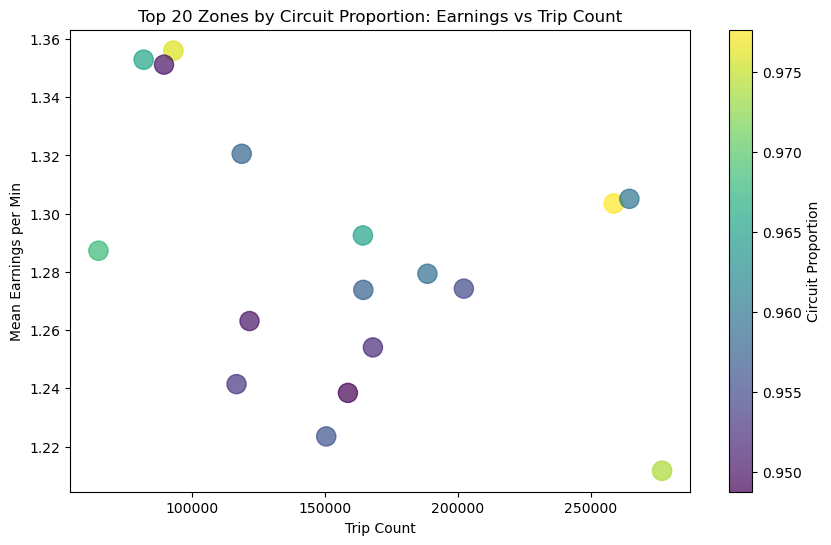

In [42]:
top_circuit_zones = zone_stats.sort_values('circuit_proportion', ascending=False).head(20)

# Filter out zones with low trip counts if desired
top_circuit_zones_filtered = top_circuit_zones[top_circuit_zones['trip_count'] > 50]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    top_circuit_zones_filtered['trip_count'],
    top_circuit_zones_filtered['earnings_mean'],
    s=top_circuit_zones_filtered['circuit_proportion'] * 200,  # scale point size by circuit proportion
    alpha=0.7,
    c=top_circuit_zones_filtered['circuit_proportion'],
    cmap='viridis'
)
plt.colorbar(scatter, label='Circuit Proportion')
plt.xlabel('Trip Count')
plt.ylabel('Mean Earnings per Min')
plt.title('Top 20 Zones by Circuit Proportion: Earnings vs Trip Count')
plt.show()


In [43]:
# Which zones have the most consistent earnings?
earnings_stability = flow.groupby('pickup_zone')['effective_earnings_per_min'].agg(['mean', 'std'])
earnings_stability['consistency'] = earnings_stability['mean'] / earnings_stability['std']
earnings_stability

,mean,std,consistency
pickup_zone,,,
Allerton/Pelham Gardens,0.959309,1.838639,0.521749
Alphabet City,1.357366,1.294251,1.048766
Arden Heights,4.916203,4.976682,0.987847
Arrochar/Fort Wadsworth,1.759391,3.398453,0.517703
Astoria,1.009058,1.467960,0.687388
...,...,...,...
Woodlawn/Wakefield,1.839709,3.169805,0.580386
Woodside,1.283010,2.346053,0.546880
World Trade Center,1.770011,1.760614,1.005337


#### 11c. Circuit vs. Deadhead - Write the flow dataframe to a CSV

In [49]:
default_filename = "Flow_DF_Circuit_Deadhead"

# Hide the root Tkinter window
Tk().withdraw()

# Open save file dialog (no default path logic)
save_path = asksaveasfilename(
    initialfile=default_filename,
    title="Select where to save the flow CSV",
    defaultextension=".csv",
    filetypes=[("CSV files", "*.csv")]
)

if save_path:
    flow.to_csv(save_path, index=False)
    print(f"Dataframe saved to: {save_path}")
    print(f"Final shape: {df.shape}")
else:
    print("Save cancelled, file was not saved.")

Dataframe saved to: /Users/elliekavanagh/Downloads/Flow_DF_Circuit_Deadhead.csv
Final shape: (5681049, 21)
